In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

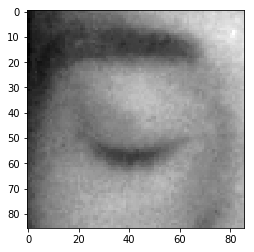

In [3]:
Datadirectory = r"C:\Users\acer\Desktop\EyesCopy"  ##here we mention link of the training data set path
Classes = ["Closed_Eyes","Open_Eyes"] ##list of classes
for category in Classes:
    path = os.path.join(Datadirectory, category)  ##//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) ## here we are changing the image type to gray to rgb because deep learning supports only rgb
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break## here he used break to execute upto only one data, But we dont need
    ## here he used break to execute upto only one data, But we dont need


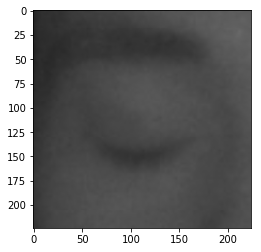

In [4]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_Data = []
 
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## @ 1.
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
create_training_Data()

In [7]:
print(len(training_Data))


3058


In [8]:
import random

random.shuffle(training_Data)


In [9]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [10]:
X.shape


(3058, 224, 224, 3)

In [11]:
X=X/255.0;

In [12]:
Y=np.array(y)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [13]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y=pickle.load(pickle_in)



In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = tf.keras.applications.mobilenet.MobileNet()


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [16]:
base_input = model.layers[0].input

In [17]:
base_output = model.layers[-4].output

In [18]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)


In [19]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [20]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [22]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [23]:
new_model.fit(X, Y, epochs=1, validation_split= 0.1)

Train on 2752 samples, validate on 306 samples
Epoch 1/1
2752/2752 [==============================] - 2507s 911ms/step - loss: 0.0580 - acc: 0.9815 - val_loss: 4.9664 - val_acc: 0.5490


In [24]:
new_model.save("my_model.h5")

In [25]:
img_array = cv2.imread(r"\Users\acer\Desktop\EyesCopy\Open_Eyes\s0001_02027_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [26]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)


In [27]:
X_input.shape

(1, 224, 224, 3)

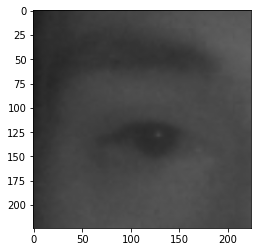

In [28]:
plt.imshow(new_array)

In [29]:
X_input = X_input/255.0


In [30]:
prediction = new_model.predict(X_input)


In [31]:
prediction

array([[5.0217466e-05]], dtype=float32)

In [86]:
img = cv2.imread(r"\Users\acer\Desktop\downloadclose3.jpg")

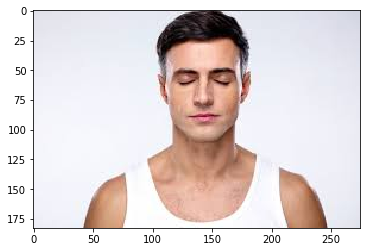

In [87]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [88]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")


In [89]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")


In [90]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)


In [91]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


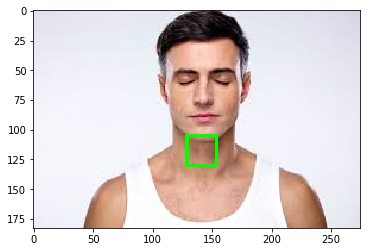

In [92]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [93]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if(len(eyess) == 0) :
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]



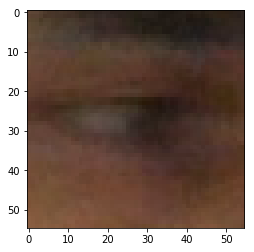

In [94]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [95]:
eyes_roi.shape


(55, 55, 3)

In [96]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)


In [97]:
final_image = final_image/255.0

In [98]:
final_image.shape

(1, 224, 224, 3)

In [99]:
new_model.predict(final_image)


array([[3.8242697e-06]], dtype=float32)

In [100]:
#Check every line, if everyline is ok, then leave this and go to next code!! got it ??? ok I'll check once!!
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
#counter =0

while True:
    ret,img = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image=final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>=0.5000):
        #counter = counter + 1
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(img,
               status,
               (50, 50),
               font, 3,
               (0, 0, 255),
               2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', img)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destryAllWindows()

eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
Fa

KeyboardInterrupt: 

In [115]:
#This is the next code!!, pls ack?
import winsound
#import cv2                 #edited

frequency =25000
duration =10000
import numpy as np #edited
import cv2 #edited
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0        #edited
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w] #???freame aa?? video lo chudu, img is not defined!
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #print("Printing eyes - roi matrix",eyes_roi)
    
    final_image = cv2.resize(eyes_roi, (224,224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0.1):
        status = "Open eyes"
        counter = 0
        cv2.putText(frame,
                    status,
                    (150,150),
                    font, 3,
                    (0, 255, 0),
                    2,
                    cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        #draw bg rectangl black
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        #Add text
        
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
    else:
        counter = counter +1
        status = "Closed eyes"
        cv2.putText(frame,
                    status,
                    (150,150),
                    font, 3,
                    (0,0,255),
                    2,
                    cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        if counter>10:
            x1,y1,w1,h1 = 0,0,175,75
            #draw bg rectangl black
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1),(0,0,0), -1)
            #Add text
            cv2.putText(frame, 'Sleep Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            #print(winsound.__file__)
            winsound.PlaySound(r"\Users\acer\Desktop\censor-beep-7.wav", winsound.SND_FILENAME)  
            counter = 0
            
    cv2.imshow("Drowsiness Detection Tutor",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

    
cap.release()
cv2.destroyAllWindows()

#check the error, font has to be defined previous to it's use! 
#So kernel restart ayindi :(malli sta
 

False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
Fals

KeyboardInterrupt: 